<a href="https://colab.research.google.com/github/rahulbalaji10/CE888-module/blob/main/Project1/working_hate_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#uploading the datasets
#training_set
df=pd.read_csv("train_text.txt",sep='delimiter',header=None)
df_1=pd.read_csv("train_labels.txt",sep='delimiter',header=None)




C:\Users\NEW\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NEW\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [ ]:
df.shape



(8993, 1)

In [ ]:
df_1.shape

(9000, 1)

In [ ]:
#giving a column name
df.columns=["lines"]
df_1.columns=["outcomes"]
df.head(10)

,lines
0,@user nice new signage. Are you not concerned ...
1,A woman who you fucked multiple times saying y...
2,@user @user real talk do you have eyes or were...
3,your girlfriend lookin at me like a groupie in...
4,Hysterical woman like @user
5,Me flirting- So tell me about your father...
6,The Philippine Catholic bishops' work for migr...
7,I AM NOT GOING AFTER YOUR EX BF YOU LIEING SAC...
8,When cuffin season is finally over
9,"Send home migrants not in need of protection, ..."


In [ ]:
df_1.tail(10)

,outcomes
8990,0
8991,0
8992,0
8993,1
8994,0
8995,0
8996,0
8997,1
8998,0
8999,1


In [ ]:
df.isnull().sum()

lines    0
dtype: int64

In [ ]:
#removing @user
words=["@user"]

for word in words:
    df["lines"]=df["lines"].str.replace(word,"")
df

,lines
0,nice new signage. Are you not concerned by Be...
1,A woman who you fucked multiple times saying y...
2,real talk do you have eyes or were they goug...
3,your girlfriend lookin at me like a groupie in...
4,Hysterical woman like
...,...
8988,Oooohhhh bitch didn't even listen to the dead ...
8989,Good Luck More Americans #WalkAwayFromDemocr...
8990,Bitch you can't keep up so stop trying
8991,Japan is always operating under the prem...


In [ ]:
#converting_lower case
df["lines"]=df["lines"].str.lower()
df

,lines
0,nice new signage. are you not concerned by be...
1,a woman who you fucked multiple times saying y...
2,real talk do you have eyes or were they goug...
3,your girlfriend lookin at me like a groupie in...
4,hysterical woman like
...,...
8988,oooohhhh bitch didn't even listen to the dead ...
8989,good luck more americans #walkawayfromdemocr...
8990,bitch you can't keep up so stop trying
8991,japan is always operating under the prem...


In [ ]:
def remove_url(tweet):
    tweet=re.sub(r'http.?://[^\s]+[\s]?',"",tweet)
    return (tweet)
df["lines"]=df.lines.apply(lambda x:remove_url(x))    

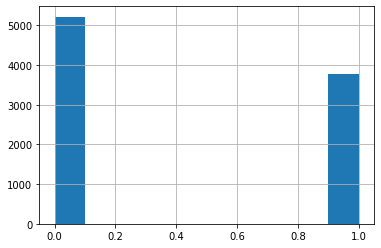

In [ ]:

x_train=df["lines"]
y_train=df_1["outcomes"]
df_1['outcomes'].hist()

In [ ]:
import nltk 


In [ ]:
from nltk.tokenize import word_tokenize as tk

df['a'] = df.apply(lambda row: nltk.word_tokenize(row['lines']), axis=1)


In [ ]:
df_2=pd.read_csv("test_text.txt",sep='delimiter',header= None)
df_3=pd.read_csv("test_labels.txt",sep='delimiter',header=None)

df_2.columns=["x_test"]
df_3.columns=["y_test"]
concate=[df_2,df_3]
df_test=pd.concat(concate,axis=1,join="inner")
df_test.head()

C:\Users\NEW\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\NEW\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,x_test,y_test
0,"@user , you are correct that Reid certainly is...",0
1,Whoever just unfollowed me you a bitch,1
2,@user @user Those People Invaded Us!!! They DO...,1
3,"stop JUDGING bitches by there cover, jus cuz s...",1
4,how about i knock heads off and send them gift...,1


In [ ]:
import re
words=["@user"]
for word in words:
    df_test["x_test"]=df_test["x_test"].str.replace(word,"")
df_test
def remove(url):
    url=re.sub(r'http.?://[^\s]+[\s]?','',url)
    return url
df_test["x_test"]=df_test.x_test.apply(lambda x:remove(x))
df_test.head()

,x_test,y_test
0,", you are correct that Reid certainly is a we...",0
1,Whoever just unfollowed me you a bitch,1
2,Those People Invaded Us!!! They DO NOT BELIN...,1
3,"stop JUDGING bitches by there cover, jus cuz s...",1
4,how about i knock heads off and send them gift...,1
